## Messing with data

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
from scipy import stats

In [40]:
data = pd.read_csv('clean_murder_data.csv')

/Users/bennyfish/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#work on creating a sqllite class and database.

In [ ]:
data.head()

## Creating State database

In [4]:
# Pull in StateAbbr csv and merge with State dataframe
statesAbbr = pd.read_csv("StatesAbbr.csv")
print(statesAbbr.head())

        State Abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [5]:
# Total Murders by state since 1976
totalMurders = data.groupby('State')['ID'].count()
print(totalMurders.head())
totalMurders_df = totalMurders.reset_index().rename(columns={'ID':"TotalMurders"})
print(totalMurders_df.head())

State
Alabama        15687
Alaska          1952
Arizona        14482
Arkansas        8081
California    114621
Name: ID, dtype: int64
        State  TotalMurders
0     Alabama         15687
1      Alaska          1952
2     Arizona         14482
3    Arkansas          8081
4  California        114621


In [6]:
# Number of UNSOLVED homicides by state since 1976
unsolved = data.loc[data['Solved'] == 'No']
unsolved = unsolved.groupby('State')['ID'].count()
print(unsolved.head())
unsolved_df = unsolved.reset_index().rename(columns={"ID":"TotalUnsolved"})
print(unsolved_df.head())

State
Alabama        3350
Alaska          362
Arizona        4065
Arkansas       1217
California    41459
Name: ID, dtype: int64
        State  TotalUnsolved
0     Alabama           3350
1      Alaska            362
2     Arizona           4065
3    Arkansas           1217
4  California          41459


In [7]:
# Percent of UNSOLVED homicides by state since 1976
percentUnsolved = (unsolved/totalMurders)*100
percentUnsolved = percentUnsolved.round(1)
print(percentUnsolved.round(1).head())
percentUnsolved_df = pd.DataFrame(percentUnsolved).reset_index().rename(columns={'ID':'PercentUnsolved'})
print(percentUnsolved_df.head())

State
Alabama       21.4
Alaska        18.5
Arizona       28.1
Arkansas      15.1
California    36.2
Name: ID, dtype: float64
        State  PercentUnsolved
0     Alabama             21.4
1      Alaska             18.5
2     Arizona             28.1
3    Arkansas             15.1
4  California             36.2


In [8]:
# Number of SOLVED homicides by state since 1976
solved = data.loc[data['Solved'] == 'Yes']
solved = solved.groupby('State')['ID'].count()
print(solved.head())
solved_df = solved.reset_index().rename(columns={"ID":"TotalSolved"})
print(solved_df.head())

State
Alabama       12337
Alaska         1590
Arizona       10417
Arkansas       6864
California    73162
Name: ID, dtype: int64
        State  TotalSolved
0     Alabama        12337
1      Alaska         1590
2     Arizona        10417
3    Arkansas         6864
4  California        73162


In [9]:
# Percent of SOLVED homicides by state since 1976
percentSolved = (solved/totalMurders)*100
percentSolved = percentSolved.round(1)
print(percentSolved.head())
percentSolved_df = pd.DataFrame(percentSolved).reset_index().rename(columns={'ID':'PercentSolved'})
print(percentSolved_df.head())

State
Alabama       78.6
Alaska        81.5
Arizona       71.9
Arkansas      84.9
California    63.8
Name: ID, dtype: float64
        State  PercentSolved
0     Alabama           78.6
1      Alaska           81.5
2     Arizona           71.9
3    Arkansas           84.9
4  California           63.8


In [ ]:
stateWeapon= data.groupby(['State','Weapon'])["ID"].count().reset_index()
print(stateWeapon.head())
stateWeapon = stateWeapon.sort_values(["ID"], ascending=False)
stateWeapon_df = stateWeapon.drop_duplicates(["State"])
print(stateWeapon_df.head())

In [10]:
def month_string_to_number(string):
    m = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr':4,
         'may':5,
         'jun':6,
         'jul':7,
         'aug':8,
         'sep':9,
         'oct':10,
         'nov':11,
         'dec':12
        }
    s = string.strip()[:3].lower()

    try:
        out = m[s]
        return out
    except:
        raise ValueError('Not a month')

              State      Month  TotalMurders  MonthNums
400  North Carolina    January          2029          1
399  North Carolina   February          1757          2
403  North Carolina      March          1921          3
396  North Carolina      April          1962          4
404  North Carolina        May          2002          5
402  North Carolina       June          2019          6
401  North Carolina       July          2183          7
397  North Carolina     August          2164          8
407  North Carolina  September          1967          9
406  North Carolina    October          1994         10
405  North Carolina   November          1936         11
398  North Carolina   December          2024         12


<Container object of 3 artists>

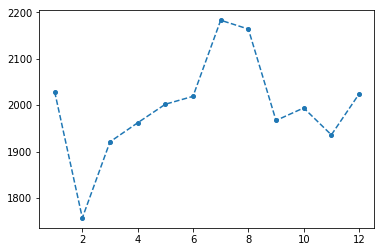

In [39]:
stateMurdersByMonth = data.groupby(['State','Month'])["ID"].count().reset_index()
#print(stateMurdersByMonth.head())
stateMurdersByMonth['MonthNums']=stateMurdersByMonth['Month'].map(month_string_to_number)
stateMurdersByMonth = stateMurdersByMonth.rename(columns={'ID':'TotalMurders'})
stateMurdersByMonth = stateMurdersByMonth.sort_values(['State',"MonthNums"], ascending=True)
# Use below to 
plotala=stateMurdersByMonth.loc[stateMurdersByMonth['State']=='North Carolina']
print(plotala)
plt.errorbar(plotala.MonthNums, plotala['TotalMurders'], 
                 linestyle='--', marker='.', markersize=8)


State      Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
MonthNums                                                             
1             1314     154     1188       704        9513       629   
2             1120     148     1068       572        8233       545   
3             1205     193     1240       646        9005       589   
4             1243     135     1191       642        9105       622   
5             1245     173     1195       684        9623       595   

State      Connecticut  Delaware  District of Columbia  Florida   ...     \
MonthNums                                                         ...      
1                  444       121                   711     3722   ...      
2                  358       123                   604     3346   ...      
3                  383       122                   641     3665   ...      
4                  406       112                   571     3483   ...      
5                  443       117              

KeyError: 'Rhode Island'

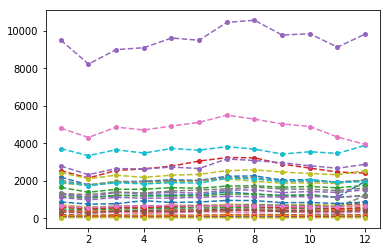

In [15]:
pivot = stateMurdersByMonth.pivot(index='MonthNums', columns='State',values='TotalMurders')
print(pivot.head())
pivot = pivot.reset_index()
for state in statesAbbr['State']:
    plt.errorbar(pivot.MonthNums, pivot[state], fmt='2', 
                 linestyle='--', marker='.', markersize=8,capsize=4)
plt.show()

In [ ]:
# Merge all State data to create final csv
state_db = statesAbbr.merge(totalMurders_df,on="State")
print(state_db.head())
state_db = state_db.merge(unsolved_df, on="State")
print(state_db.head())
state_db = state_db.merge(percentUnsolved_df, on="State")
print(state_db.head())
state_db = state_db.merge(solved_df, on="State")
print(state_db.head())
state_db = state_db.merge(percentSolved_df, on="State")
print(state_db.head())
state_db.to_csv("state_db.csv")